In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
dataset_path = '../data'
train_images = os.listdir(os.path.join(dataset_path, 'train'))
test_images = os.listdir(os.path.join(dataset_path, 'test1'))
print('train images ->', train_images[:5])
print('test images ->', test_images[:5])

train images -> ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
test images -> ['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg']


## `Converting Images`

In [12]:
h = 50
w = 50

def convert_images(images, dataset_path):
    flatten_imgs = []
    
    for image in images:
        img = cv2.imread(os.path.join(dataset_path, 'train', image))
        
        if img is None: 
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (h, w))
        img = img / 255.0
        
        flatten_img = img.flatten()
        label = 1 if image.startswith('cat') else 2
        
        flatten_img = list(flatten_img) + [label]
        flatten_imgs.append(flatten_img)
    
    columns = [f'pixel{i}' for i in range(h*w)] + ['Class']
    
    res = pd.DataFrame(flatten_imgs, columns=columns)    
    res['Class'] = res['Class'].astype('int8')  # Optionally set the 'Class' column to a smaller int type
    
    return res

batch_size = 2500
dataset = pd.DataFrame()
for start in range(0, len(train_images), batch_size):
    images = train_images[start:start + batch_size]
    image_list = convert_images(images, dataset_path)
    dataset = pd.concat([dataset, image_list], ignore_index=True)

In [13]:
dataset.shape

(25000, 2501)

In [14]:
dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Class
0,0.674510,0.705882,0.729412,0.749020,0.772549,0.792157,0.800000,0.815686,0.827451,0.843137,...,0.054902,0.054902,0.035294,0.015686,0.015686,0.007843,0.007843,0.007843,0.007843,1
1,0.164706,0.227451,0.149020,0.164706,0.172549,0.145098,0.149020,0.152941,0.160784,0.172549,...,0.254902,0.337255,0.211765,0.152941,0.196078,0.227451,0.223529,0.243137,0.113725,1
2,0.172549,0.184314,0.207843,0.227451,0.219608,0.203922,0.200000,0.188235,0.164706,0.172549,...,0.290196,0.290196,0.305882,0.454902,0.615686,0.619608,0.560784,0.639216,0.647059,1
3,0.866667,0.878431,0.921569,0.929412,0.874510,0.890196,0.913725,0.894118,0.886275,0.878431,...,0.964706,0.960784,0.929412,0.894118,0.850980,0.803922,0.823529,0.862745,0.831373,1
4,0.443137,0.486275,0.356863,0.525490,0.772549,0.600000,0.811765,0.901961,0.588235,0.992157,...,0.392157,0.384314,0.376471,0.392157,0.345098,0.325490,0.419608,0.356863,0.356863,1


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 2501 entries, pixel0 to Class
dtypes: float32(2500), int8(1)
memory usage: 238.4 MB


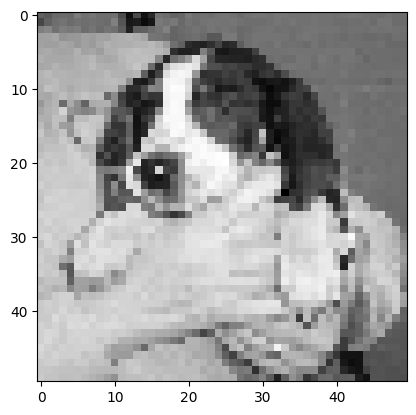

In [18]:
img = dataset.iloc[12502, :-1].values
img = img.reshape((h,w))
img = img.astype('float16')
plt.imshow(img, cmap = 'gray')
plt.show()

In [19]:
dataset.shape

(25000, 2501)

In [20]:
dataset.to_csv('../data/dogvscat_dataset.csv', index = False)